In [10]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , auc
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
from tensorflow.keras.preprocessing import image
from keras.applications import MobileNetV2
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import GlobalAveragePooling2D

In [12]:
train_path = r"D:/dataset/NewPlantDiseasesDataset/train"
valid_path = r"D:/dataset/NewPlantDiseasesDataset/valid"

In [13]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
 train_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 70295 files belonging to 38 classes.


In [14]:
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
 valid_path,
    batch_size=256,
  image_size=(224,224), shuffle=True
)

Found 17572 files belonging to 38 classes.


In [ ]:
# path = "/content/drive/MyDrive/data/test"
# test_folder = os.listdir(path)
# test_folder[:5]

In [15]:
len(train_data.class_names)

38

In [16]:
class_labels = train_data.class_names
class_labels

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [17]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Use the 'datagen' to preprocess the images loaded by 'image_data_from_directory'
train_scaled_data = datagen.flow_from_directory(
   train_path,
    target_size=(224, 224),
    batch_size=256,shuffle=True,
    class_mode='sparse'
)

valid_scaled_data = datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=256,shuffle=True,
    class_mode='sparse'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [18]:
train_scaled_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
# for img, label in train_scaled_data:
#     #print(img)
#     print(label)
#     break

In [ ]:
# label[10]

In [ ]:
# len(class_labels)

In [19]:
base_model = MobileNetV2(input_shape=(224,224,3),
                         include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a Sequential model
model = Sequential()

model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))  # Add a dense layer with 1024 units
model.add(Dense(100, activation='relu'))   # Add another dense layer with 512 units
model.add(Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()



9406464/9406464 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 100)               128100    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 38)                3838      
                                                         

In [20]:
 history = model.fit(train_scaled_data ,batch_size=256,epochs=10,
                verbose=1,
                validation_data=valid_scaled_data)

Epoch 1/10

275/275 [==============================] - 2479s 9s/step - loss: 0.6357 - accuracy: 0.8279 - val_loss: 0.2492 - val_accuracy: 0.9235
Epoch 2/10
275/275 [==============================] - 1827s 7s/step - loss: 0.1898 - accuracy: 0.9388 - val_loss: 0.1771 - val_accuracy: 0.9423
Epoch 3/10
275/275 [==============================] - 1607s 6s/step - loss: 0.1378 - accuracy: 0.9562 - val_loss: 0.1571 - val_accuracy: 0.9476
Epoch 4/10
275/275 [==============================] - 1599s 6s/step - loss: 0.1082 - accuracy: 0.9643 - val_loss: 0.1424 - val_accuracy: 0.9526
Epoch 5/10
275/275 [==============================] - 1527s 6s/step - loss: 0.0882 - accuracy: 0.9710 - val_loss: 0.1272 - val_accuracy: 0.9574
Epoch 6/10
275/275 [==============================] - 1607s 6s/step - loss: 0.0738 - accuracy: 0.9754 - val_loss: 0.1393 - val_accuracy: 0.9536
Epoch 7/10
275/275 [==============================] - 1600s 6s/step - loss: 0.0635 - accuracy: 0.9795 - val_loss: 0.1149 - val_accuracy

In [21]:
model.save("check_disease_model.h5")

In [23]:
loss,acc = model.evaluate(train_scaled_data)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(valid_scaled_data)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

275/275 [==============================] - 1660s 6s/step - loss: 0.0324 - accuracy: 0.9905
Loss on Train data: 0.03236379474401474
Accuracy on Train data: 0.9905398488044739
69/69 [==============================] - 358s 5s/step - loss: 0.1196 - accuracy: 0.9623
Loss on Test data: 0.11956263333559036
Accuracy on Test data: 0.9622695446014404


In [24]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
# print(acc)
# print(val_acc)
# print(loss)
# print(val_loss)

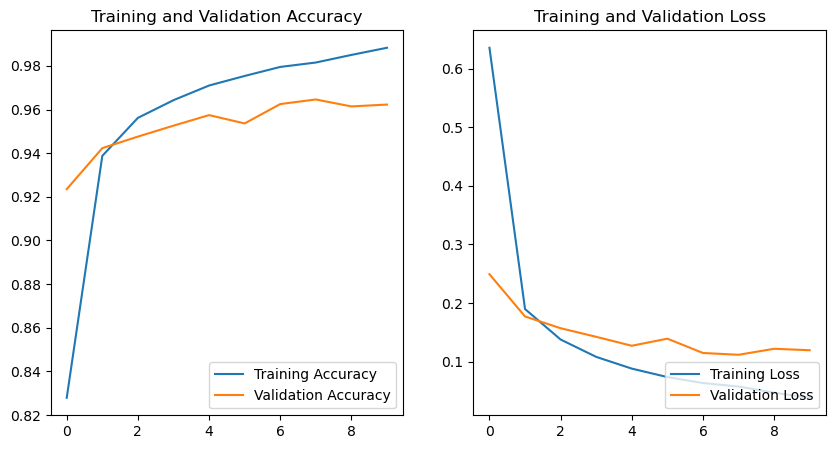

In [25]:
EPOCHS=10
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [31]:
# prediction function

def predict_Disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255
    y_pred = model.predict(img_array)
    np.argmax(y_pred[0])
    disease_detected=class_labels[np.argmax(y_pred[0])]
    return disease_detected

def predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array/255
    y_pred = model.predict(img_array)
    return np.argmax(y_pred[0])
    

In [32]:
img_path="D:/dataset/test/test/AppleCedarRust2.JPG"
print(predict_Disease(img_path))
print(predict(img_path))

1/1 [==============================] - 0s 60ms/step
Apple___Cedar_apple_rust
1/1 [==============================] - 0s 61ms/step
2


In [30]:
img_path="D:/dataset/test/test/TomatoYellowCurlVirus4.JPG"
print(predict_Disease(img_path))

1/1 [==============================] - 0s 69ms/step
Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
# class_labels[np.argmax(y_pred[0])]
img_path = "/content/drive/MyDrive/data/test/PotatoEarlyBlight5.JPG"
print(predict_Disease(img_path))

In [ ]:
img_path="/content/drive/MyDrive/data/New Plant Diseases Dataset(Augmented)/valid/Orange___Haunglongbing_(Citrus_greening)/3295f215-6022-49bc-9bfe-910ee5d0f554___CREC_HLB 4307.JPG"
print(predict_Disease(img_path))

In [ ]:
img_path="/content/drive/MyDrive/data/test/AppleScab2.JPG"
print(predict_Disease(img_path))

In [ ]:
img_path="/content/drive/MyDrive/data/test/PotatoEarlyBlight3 (1).JPG"
print(predict_Disease(img_path))